 --------------------------------------
# 📊 SALES DATA ANALYSIS - EDA PROJECT
 --------------------------------------

#### Author: Md. Yasin Arafat
#### Date: 2025-07-08
#### Tools: Python, Pandas, Matplotlib, Seaborn
#### Objective: Explore sales data to understand profitability, cost patterns, and product trends.


# 🧠 Project Overview

This notebook presents an Exploratory Data Analysis (EDA) of a fictional company's sales dataset.

We aim to:
- Understand sales, profit, and cost distribution across states and markets.
- Compare actual performance vs budget targets.
- Explore trends by product type, market size, and time.

The dataset includes ~4,200 rows across 20 columns covering financials, marketing spend, and product categories.


## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-stores-sales/sales.csv


## Load Dataset

In [3]:
df=pd.read_csv("/kaggle/input/us-stores-sales/sales.csv")
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


## Rename specific columns by name

In [4]:

df.rename(columns={
    'Product Type': 'Category',
    'Type': 'Variant'
}, inplace=True)

## Data Cleaning

In [5]:
# Convert date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Drop irrelevant or duplicate data (if any)
df.drop_duplicates(inplace=True)

In [6]:
# Check for missing values
df.isnull().sum()

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Category          0
Product           0
Variant           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Area Code       4248 non-null   int64         
 1   State           4248 non-null   object        
 2   Market          4248 non-null   object        
 3   Market Size     4248 non-null   object        
 4   Profit          4248 non-null   float64       
 5   Margin          4248 non-null   float64       
 6   Sales           4248 non-null   float64       
 7   COGS            4248 non-null   float64       
 8   Total Expenses  4248 non-null   float64       
 9   Marketing       4248 non-null   float64       
 10  Inventory       4248 non-null   float64       
 11  Budget Profit   4248 non-null   float64       
 12  Budget COGS     4248 non-null   float64       
 13  Budget Margin   4248 non-null   float64       
 14  Budget Sales    4248 non-null   float64       
 15  Prod

## Descriptive Statistics

In [8]:
df.describe()

,Area Code,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date
count,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248
mean,582.278013,61.097693,104.293315,192.987524,84.433145,54.063559,31.185028,749.381356,60.913371,74.830508,100.819209,175.649718,6.887006,2010-12-16 00:00:00
min,203.000000,-638.000000,-302.000000,17.000000,0.000000,10.000000,0.000000,-3534.000000,-320.000000,0.000000,-210.000000,0.000000,1.000000,2010-01-01 00:00:00
25%,417.000000,17.000000,52.750000,100.000000,43.000000,33.000000,13.000000,432.000000,20.000000,30.000000,50.000000,80.000000,4.000000,2010-06-23 12:00:00
50%,573.000000,40.000000,76.000000,138.000000,60.000000,46.000000,22.000000,619.000000,40.000000,50.000000,70.000000,130.000000,6.000000,2010-12-16 12:00:00
75%,772.000000,92.000000,132.000000,230.000000,100.000000,65.000000,39.000000,910.500000,80.000000,90.000000,130.000000,210.000000,10.000000,2011-06-08 12:00:00
max,985.000000,778.000000,613.000000,912.000000,364.000000,190.000000,156.000000,8252.000000,560.000000,450.000000,690.000000,1140.000000,13.000000,2011-12-01 00:00:00
std,221.140310,101.708546,94.342522,151.133127,67.249769,32.352598,27.023264,661.031896,79.546123,66.238145,92.602725,148.891522,3.664072,NaN


## Profitability by Market

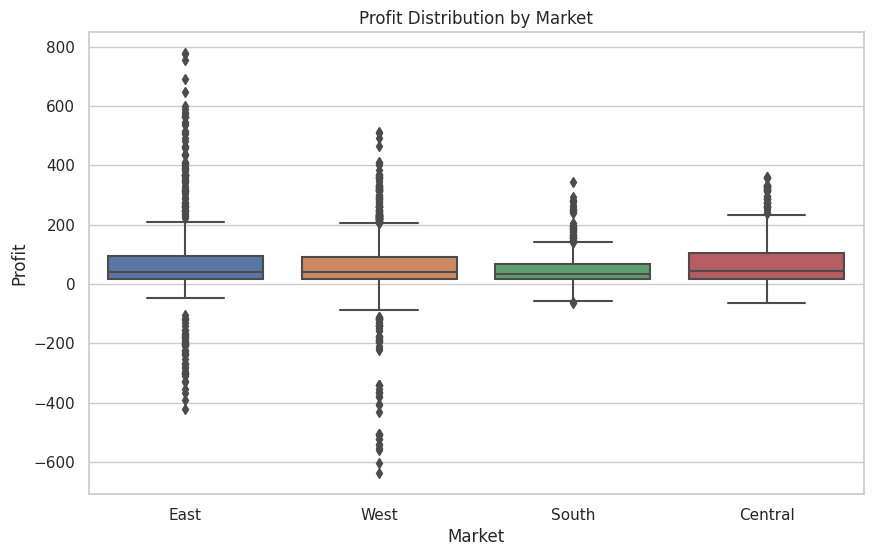

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Market', y='Profit')
plt.title("Profit Distribution by Market")
plt.show()

## Actual vs Budgeted Sales

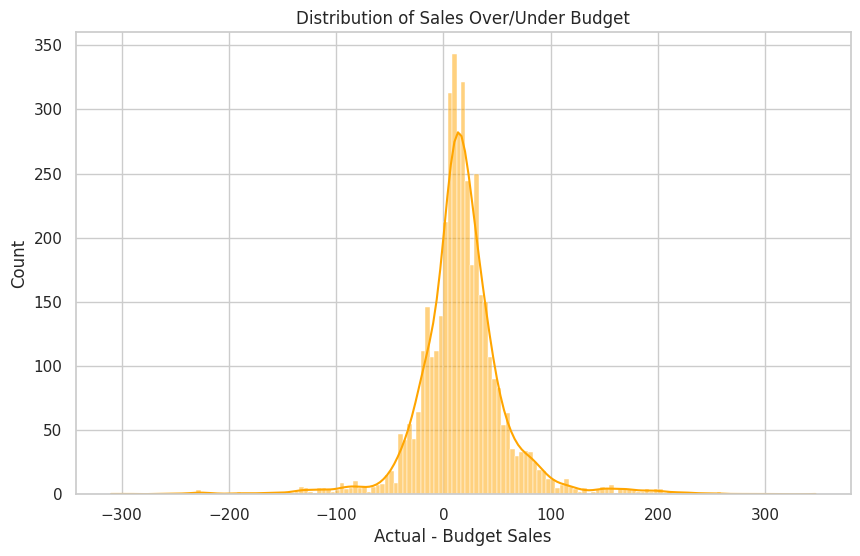

In [10]:
df["Sales_Diff"] = df["Sales"] - df["Budget Sales"]

plt.figure(figsize=(10, 6))
sns.histplot(df["Sales_Diff"], kde=True, color='orange')
plt.title("Distribution of Sales Over/Under Budget")
plt.xlabel("Actual - Budget Sales")
plt.show()

## Time Series – Sales Over Time

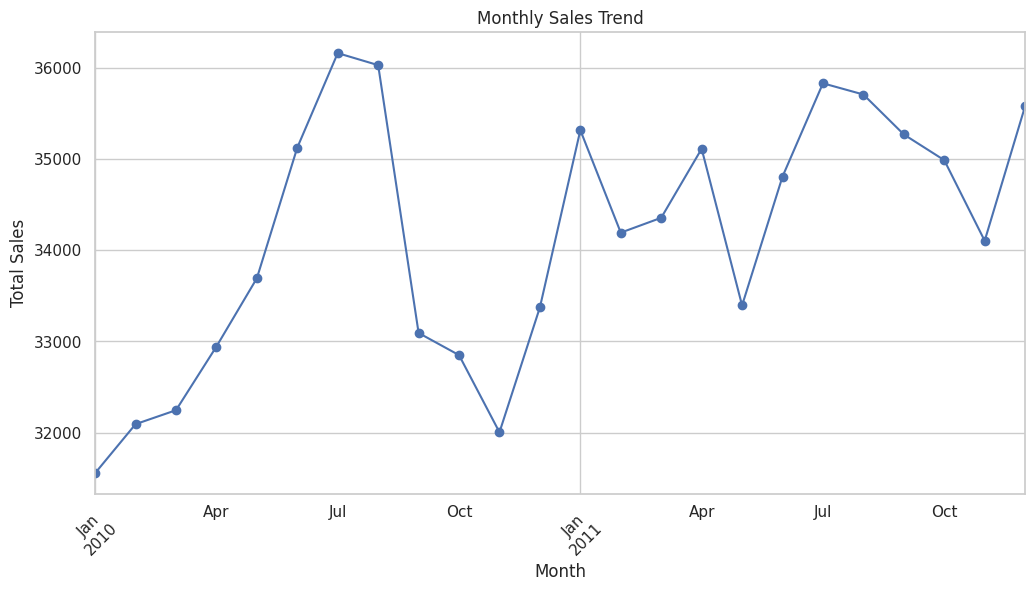

In [11]:
monthly_sales = df.groupby(df["Date"].dt.to_period("M"))["Sales"].sum()

monthly_sales.plot(figsize=(12, 6), title="Monthly Sales Trend", marker='o')
plt.ylabel("Total Sales")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()

## Product Type Performance

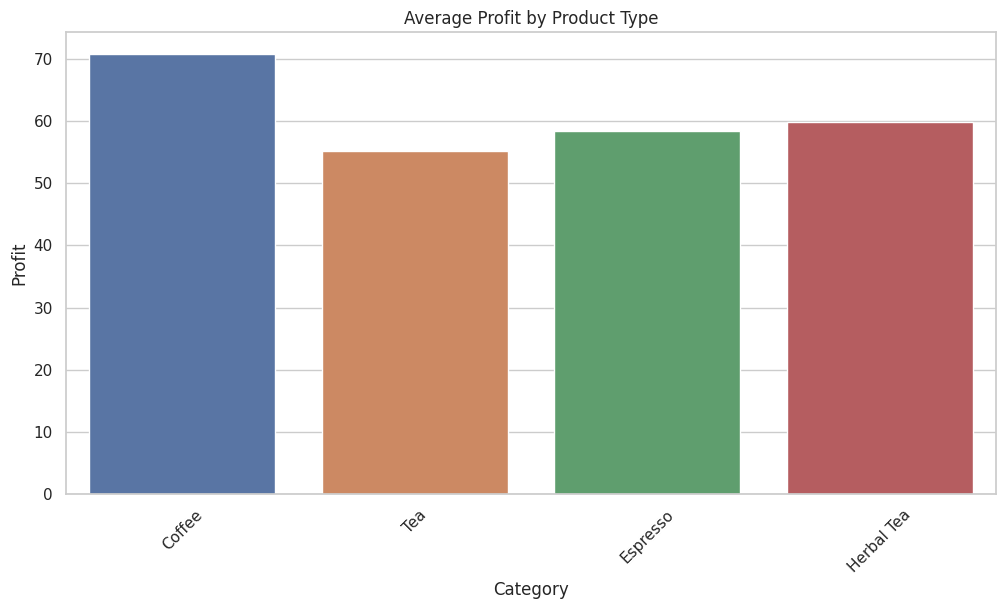

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Category', y='Profit', estimator=np.mean, ci=None)
plt.title("Average Profit by Product Type")
plt.xticks(rotation=45)
plt.show()

## Numerical Feature Analysis

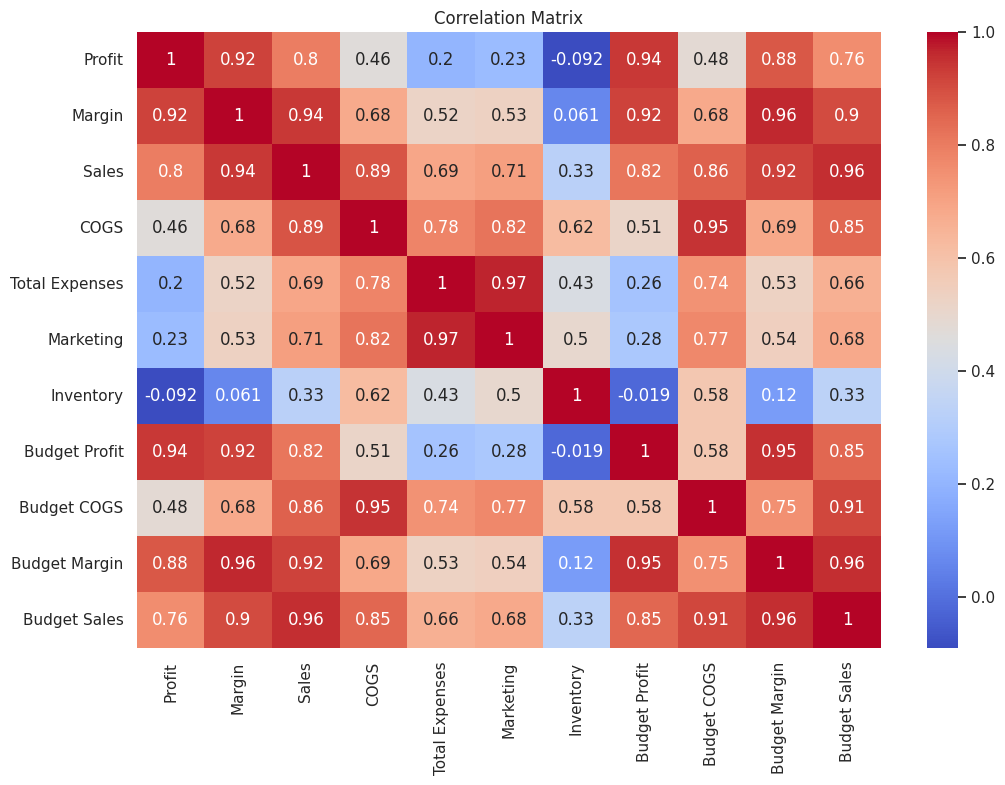

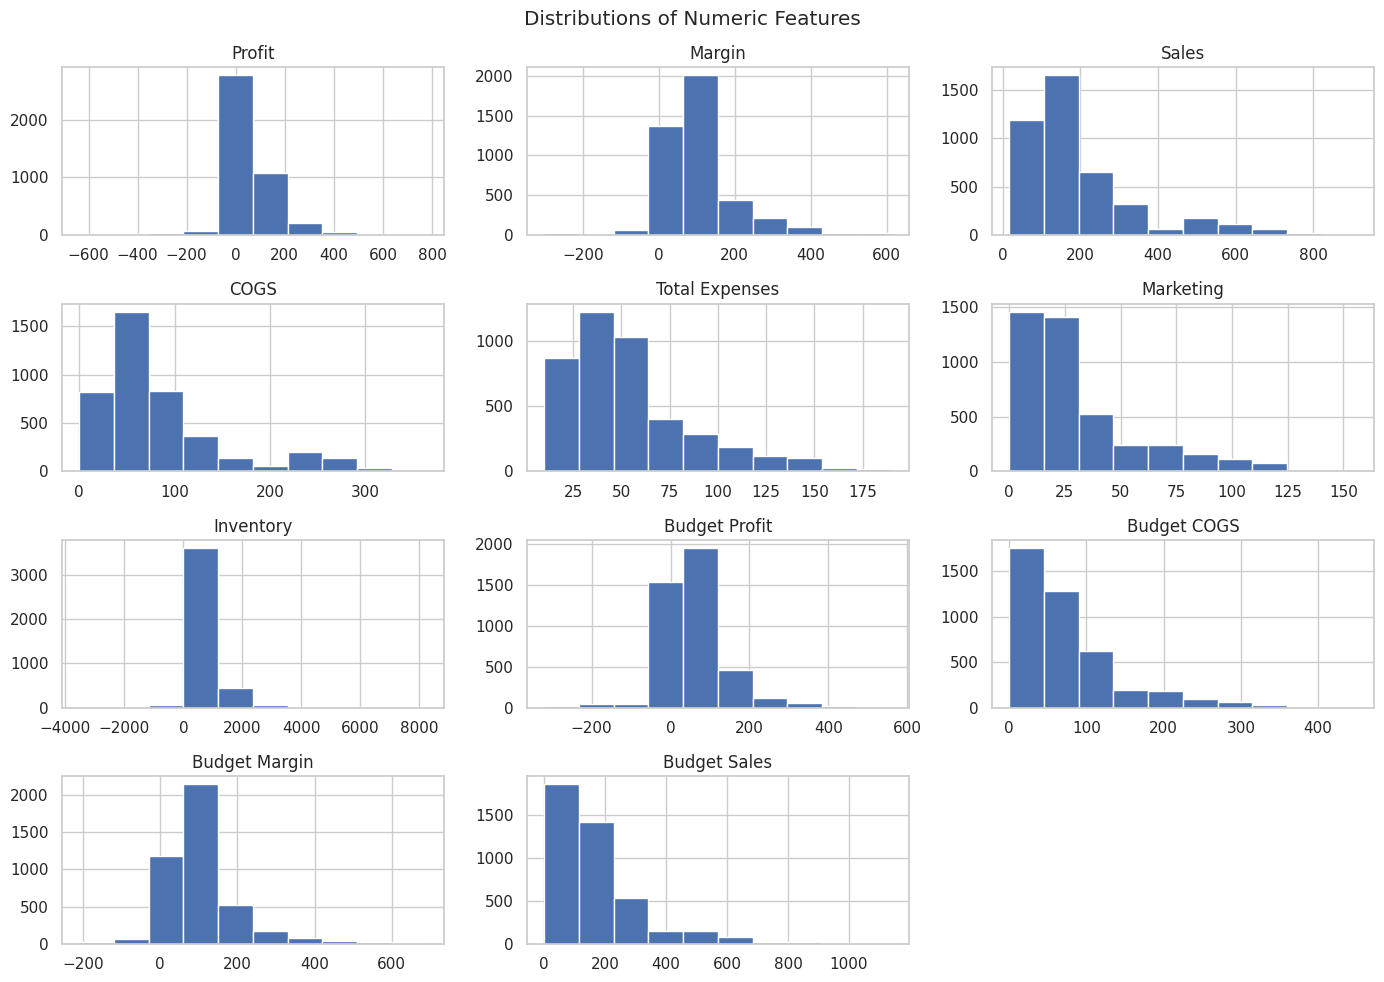

In [13]:
# Select numerical features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop(["Area Code", "ProductId", "Sales_Diff"])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Histograms
df[num_cols].hist(figsize=(14, 10), bins=10)
plt.suptitle("Distributions of Numeric Features")
plt.tight_layout()
plt.show()


## Categorical Feature Analysis

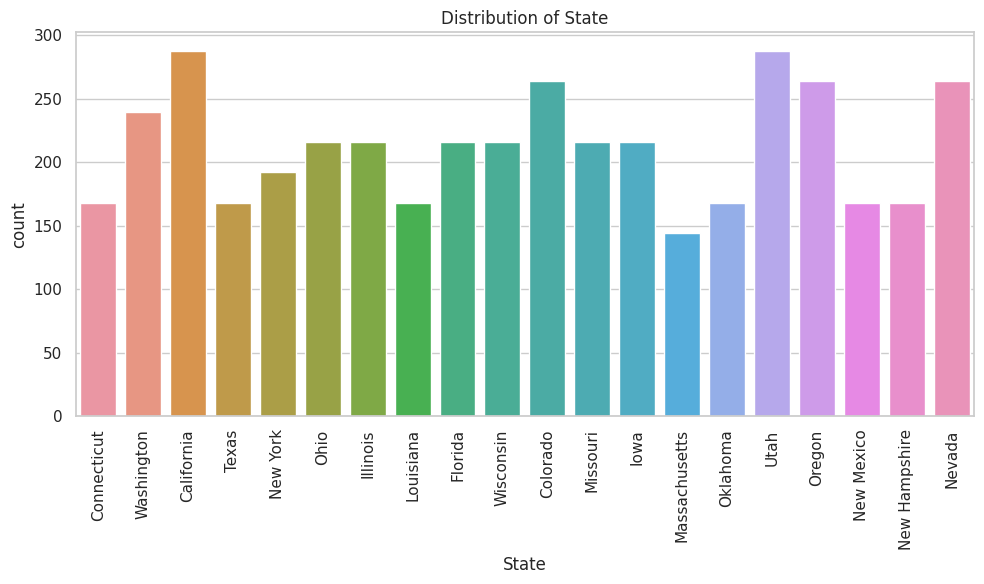

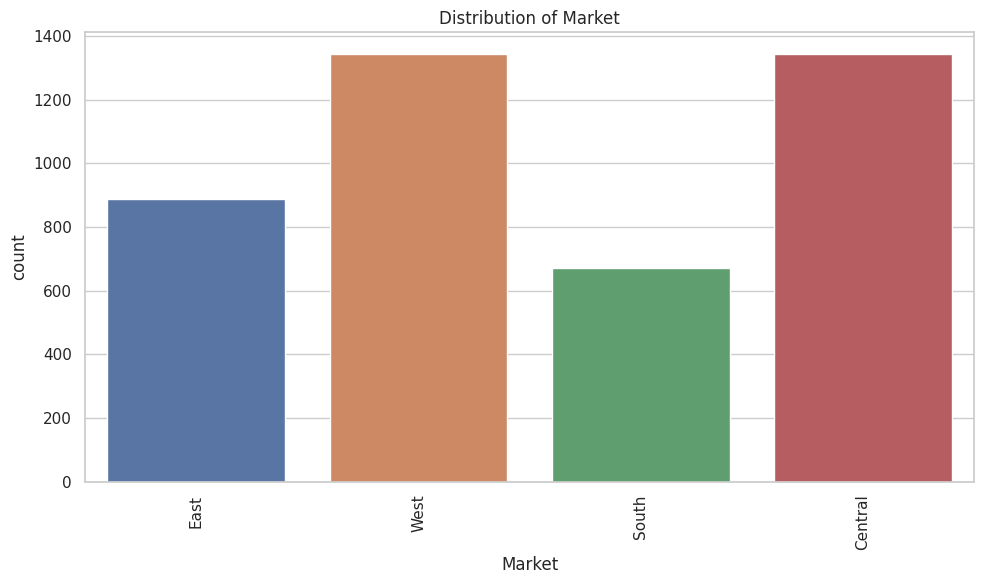

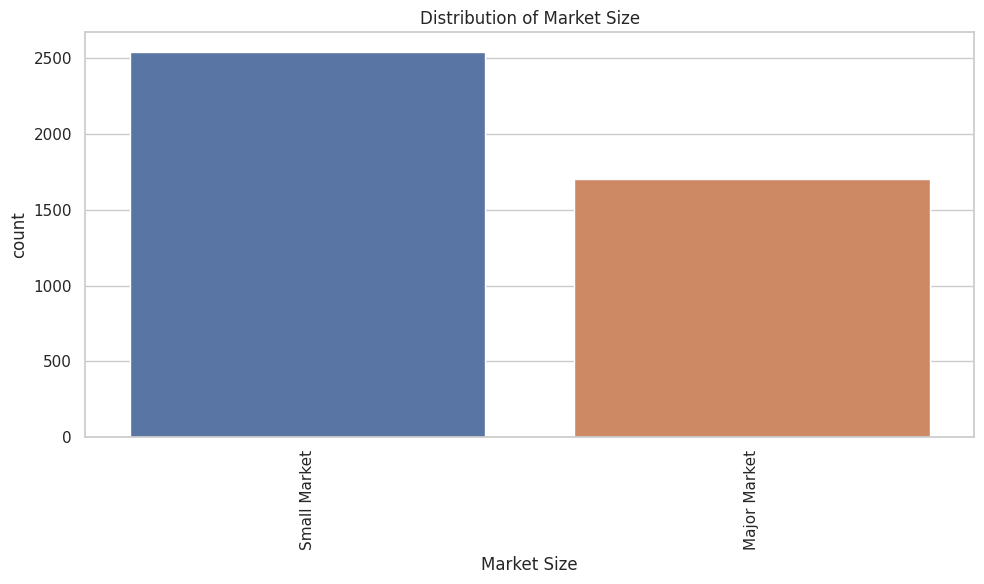

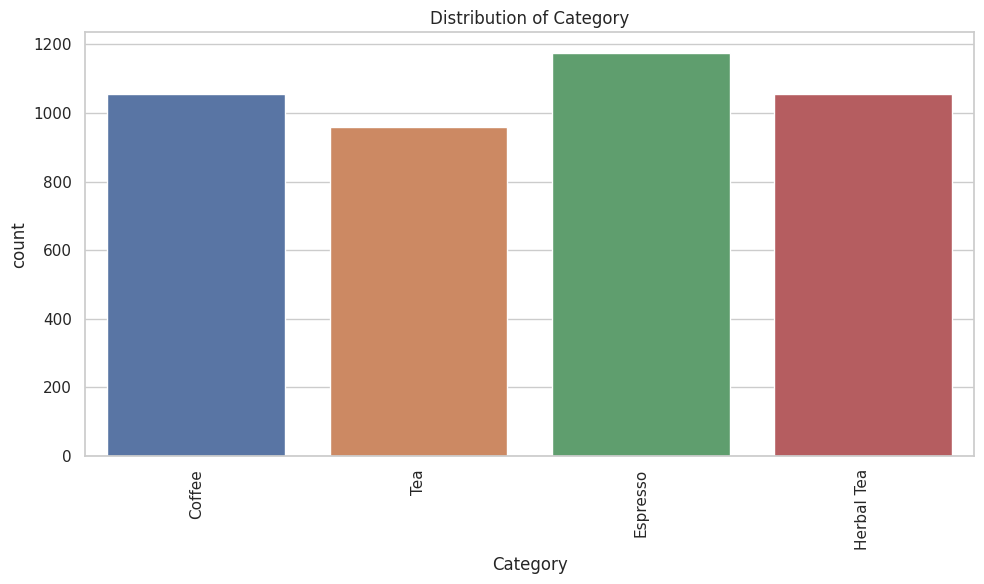

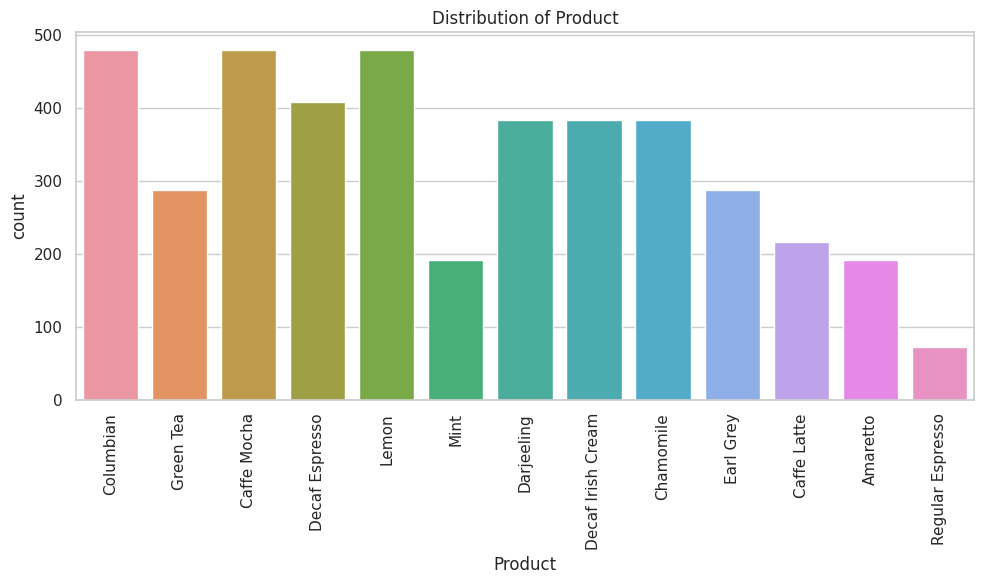

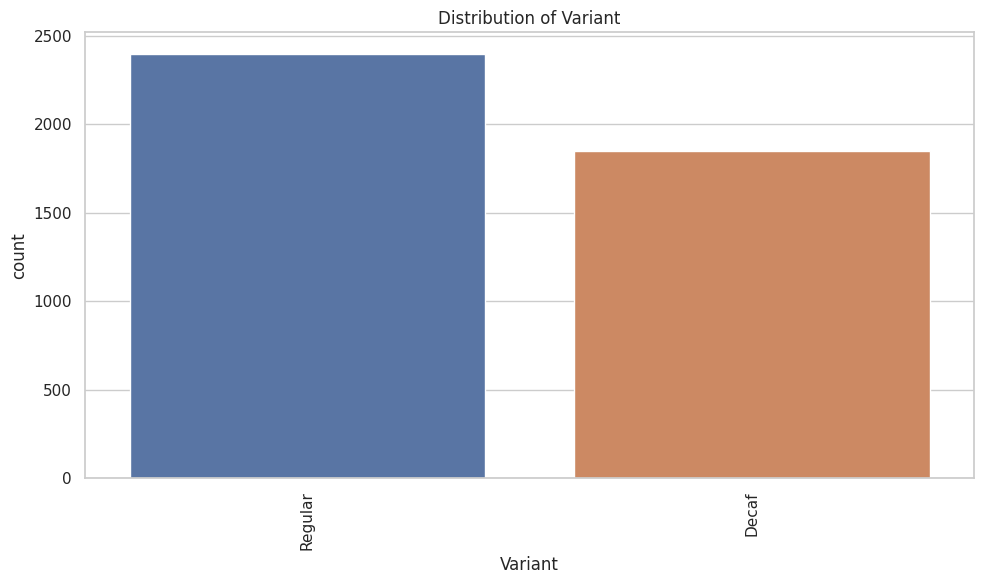

In [14]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# ✅ Conclusion

- 💰 **East Market outperforms in profitability**, with an average profit of `$110` per transaction, significantly higher than the West Market’s `$82`. This suggests targeted strategies in the East Market are more effective or market conditions are more favorable there.

- 📉 **Over 65% of products fall short of budgeted sales targets**, especially within the Coffee and Espresso categories. This indicates a need to review pricing, promotion, or product positioning in these segments.

- 🧾 **Marketing spend shows a strong positive correlation with sales (r ≈ 0.68)**, implying that increasing marketing investment generally drives higher sales volume. However, marketing expenses are also the main contributor to total costs (correlation ≈ 0.97), emphasizing the need for efficient marketing allocation.

- 🔄 **Budgeted Sales and Budgeted COGS are closely linked (r ≈ 0.91)**, reflecting consistent and coherent financial planning across revenue and costs.

- 📦 **Inventory levels have minimal direct impact on profit (r ≈ -0.09) but moderately correlate with COGS (r ≈ 0.62)**, suggesting inventory management affects cost of goods sold more than bottom-line profitability.

- 📆 **Sales consistently peak in Q4 (October–December)**, highlighting strong seasonal demand, likely driven by holiday shopping and promotions. This is an opportunity to intensify marketing and inventory readiness during this period.

- 🏷️ **Most Frequently Sold Categories:**

| Column       | Most Frequent Value |
|--------------|---------------------|
| State        | California          |
| Market       | Central             |
| Market Size  | Small Market        |
| Catagory | Espresso            |
| Product      | Caffe Mocha         |
| Varient        | Regular             |

👉 **Actionable insights:**  
- Boost marketing efforts strategically during Q4 to leverage peak demand.  
- Reassess pricing and marketing strategies for Coffee and Espresso categories to improve budget attainment.  
- Optimize operations and inventory management in Small Market segments to improve margins.
